# Importing Libraries

In [1]:
!pip install xgboost
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score



# Data Preprocessing

In [2]:
df=pd.read_csv(r"C:\Users\EMMANUELLA OTUTU\Downloads\creditcard_2023.csv")
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [3]:
df.tail()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1
568629,568629,-0.795144,0.433236,-0.649140,0.374732,-0.244976,-0.603493,-0.347613,-0.340814,0.253971,...,0.534853,-0.291514,0.157303,0.931030,-0.349423,-1.090974,-1.575113,0.722936,21493.92,1


In [4]:
df.shape

(568630, 31)

In [5]:
print("Number of columns: {}".format(df.shape[1]))
print("Number of rows: {}".format(df.shape[0]))

Number of columns: 31
Number of rows: 568630


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [7]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Features in the Dataset 

In [8]:
df["Class"].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

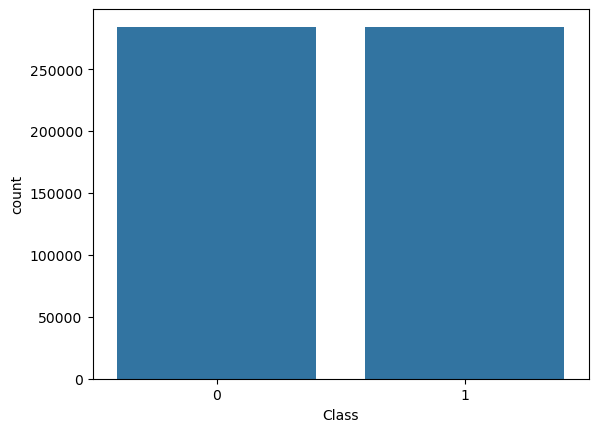

In [9]:
sns.countplot(x="Class", data=df)
plt.show()

In [10]:
df.duplicated().any()

False

In [11]:
x=df.drop(['id','Class'],axis=1, errors='ignore')
y=df['Class']

In [12]:
print(x.columns.tolist())

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


# Splitting the Dataset into Train and Test Sets

In [13]:
sc = StandardScaler()
df['Amount'] = sc.fit_transform(pd.DataFrame(df['Amount']))

In [14]:
x_train, x_test, y_train,y_test = train_test_split (x,y, test_size=0.2, random_state=42)

# Training the Classification Models

In [15]:
rf = rf_model = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [16]:
y_pred = rf.predict(x_test)
y_prob = rf.predict_proba(x_test)[:,1]

# Evaluating Model Performance

In [17]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)

In [18]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}") # Measures the percentage of correct predictions.
print(f"Precision: {precision_score(y_test, y_pred):.4f}") #How many of the predicted fraudulent transactions were actually fraudulent.
print(f"Recall: {recall_score(y_test, y_pred):.4f}")    # How many of the actual fraudulent transactions were correctly identified.
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")      # The harmonic mean of precision and recall.
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob):.4f}")  # Measures the trade-off between the true positive rate (recall) and false positive rate.


Accuracy: 0.9999
Precision: 0.9998
Recall: 1.0000
F1 Score: 0.9999
ROC-AUC Score: 1.0000


In [19]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)

C:\Users\EMMANUELLA OTUTU\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
y_pred1 = log.predict(x_test)
y_prob1 = log.predict_proba(x_test)[:,1]

In [21]:
print(f"Accuracy: {accuracy_score(y_test, y_pred1):.4f}") # Measures the percentage of correct predictions.
print(f"Precision: {precision_score(y_test, y_pred1):.4f}") #How many of the predicted fraudulent transactions were actually fraudulent.
print(f"Recall: {recall_score(y_test, y_pred1):.4f}")    # How many of the actual fraudulent transactions were correctly identified.
print(f"F1 Score: {f1_score(y_test, y_pred1):.4f}")      # The harmonic mean of precision and recall.
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob1):.4f}")

Accuracy: 0.9603
Precision: 0.9770
Recall: 0.9430
F1 Score: 0.9597
ROC-AUC Score: 0.9917


In [22]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)
y_pred2 = xgb_model.predict(x_test)
y_prob2 = xgb_model.predict_proba(x_test)[:,1]

In [23]:
print(f"Accuracy: {accuracy_score(y_test, y_pred2):.4f}") # Measures the percentage of correct predictions.
print(f"Precision: {precision_score(y_test, y_pred2):.4f}") #How many of the predicted fraudulent transactions were actually fraudulent.
print(f"Recall: {recall_score(y_test, y_pred2):.4f}")    # How many of the actual fraudulent transactions were correctly identified.
print(f"F1 Score: {f1_score(y_test, y_pred2):.4f}")      # The harmonic mean of precision and recall.
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob2):.4f}")

Accuracy: 0.9997
Precision: 0.9994
Recall: 1.0000
F1 Score: 0.9997
ROC-AUC Score: 1.0000


In [24]:
final_data = pd.DataFrame ({'Models':['RF','LG','XGB'],
               "ACC":[accuracy_score(y_test, y_pred)*100,
                      accuracy_score(y_test, y_pred1)*100,
                      accuracy_score(y_test, y_pred2)*100
                     ]})

In [25]:
final_data = pd.DataFrame({
    'Models': ['RF', 'LG', 'XGB'],
    "Accuracy": [
        accuracy_score(y_test, y_pred) * 100,
        accuracy_score(y_test, y_pred1) * 100,
        accuracy_score(y_test, y_pred2) * 100
    ],
    "Precision": [
        precision_score(y_test, y_pred, average='binary') * 100,
        precision_score(y_test, y_pred1, average='binary') * 100,
        precision_score(y_test, y_pred2, average='binary') * 100
    ],
    "Recall": [
        recall_score(y_test, y_pred, average='binary') * 100,
        recall_score(y_test, y_pred1, average='binary') * 100,
        recall_score(y_test, y_pred2, average='binary') * 100
    ],
    "F1 Score": [
        f1_score(y_test, y_pred, average='binary') * 100,
        f1_score(y_test, y_pred1, average='binary') * 100,
        f1_score(y_test, y_pred2, average='binary') * 100
    ],
    "ROC AUC": [
        roc_auc_score(y_test, y_pred)* 100,
        roc_auc_score(y_test, y_pred1)* 100,
        roc_auc_score(y_test, y_pred2)* 100
    ]})

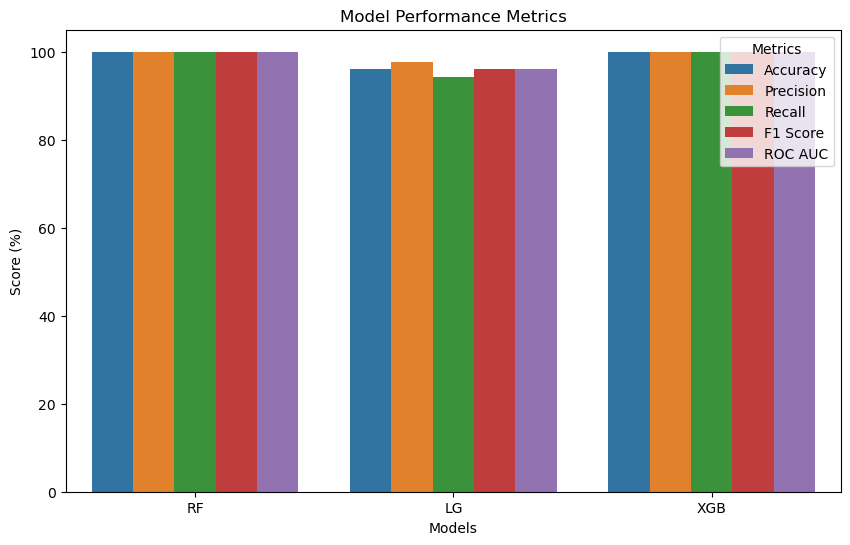

In [26]:
melted_data = final_data.melt(id_vars=["Models"], var_name="Metric", value_name="Score")

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="Models", y="Score", hue="Metric", data=melted_data)
plt.title("Model Performance Metrics")
plt.ylabel("Score (%)")
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.show()

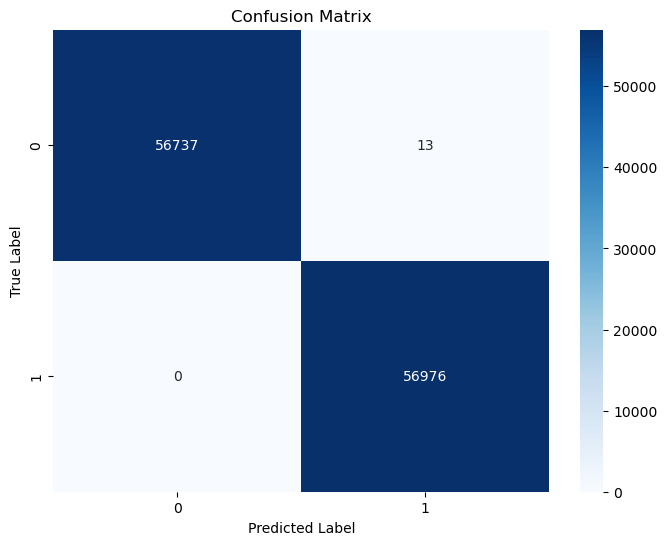

In [27]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt = 'd', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()            


In [28]:
importance = rf_model.feature_importances_
feature_imp = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importance
}).sort_values('Importance', ascending=False)


In [29]:
feature_imp.head()

,Feature,Importance
13,V14,0.214580
11,V12,0.118668
16,V17,0.108015
3,V4,0.103516
9,V10,0.101506


C:\Users\EMMANUELLA OTUTU\AppData\Local\Temp\ipykernel_5608\2701376314.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=datafeature_imp, x='Importance', y='Feature',  hue=None, palette='viridis')


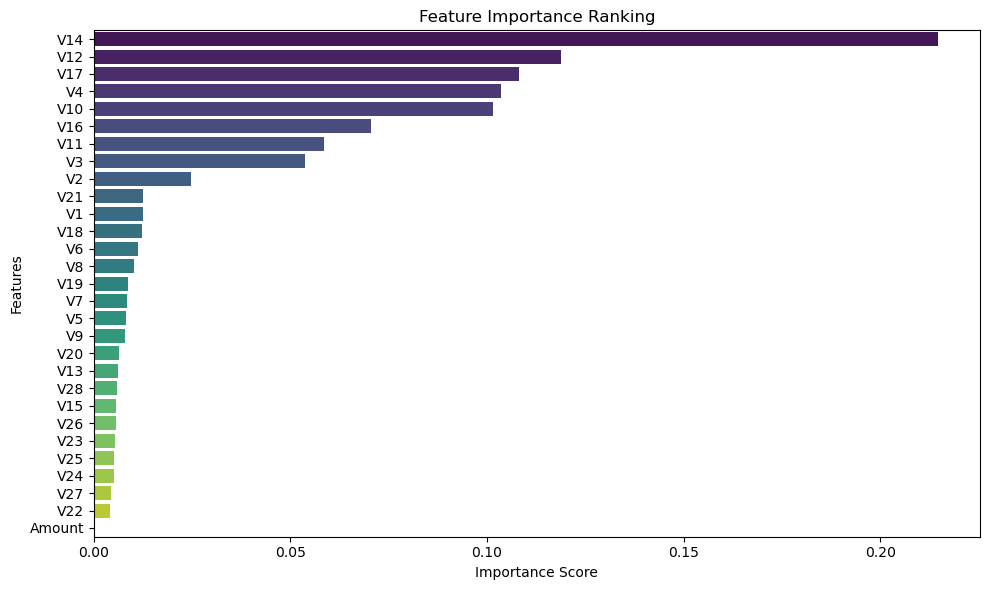

In [30]:
features = x_train.columns
feature_importances = rf_model.feature_importances_
datafeature_imp = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})
datafeature_imp = datafeature_imp.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=datafeature_imp, x='Importance', y='Feature',  hue=None, palette='viridis')
plt.title('Feature Importance Ranking')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

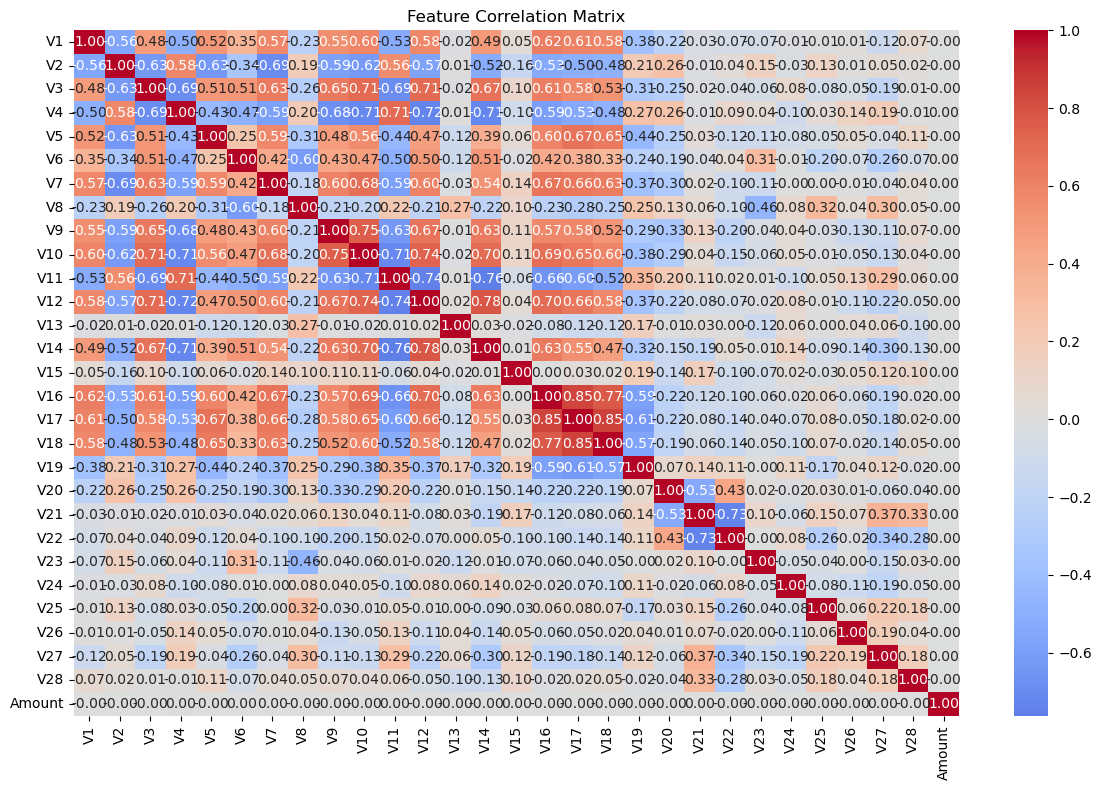

In [31]:
plt.figure(figsize=(12,8))
correlation_matrix = x.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=True, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()      

In [32]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = rf_model.predict_proba(x_test)[:, 1]
fpr, tpr,_ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

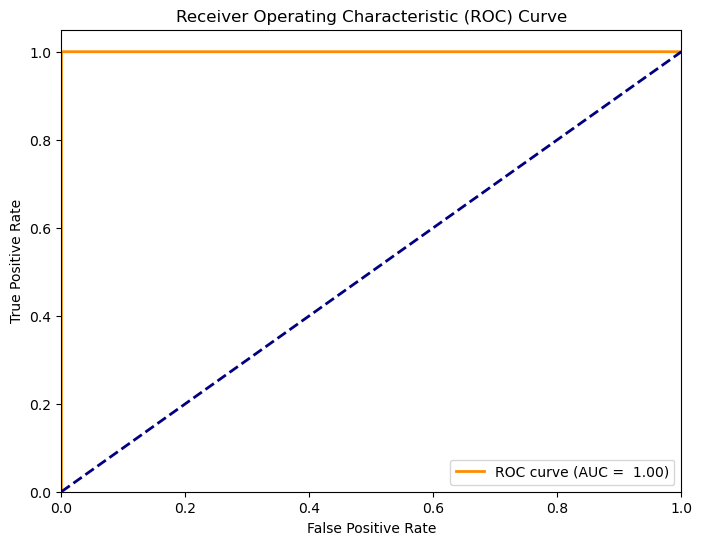

In [33]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr,color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc: .2f})')
plt.plot([0, 1],[0, 1], color='navy', lw=2, linestyle='--')
plt.xlim ([0.0, 1.0])
plt.ylim ([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [34]:
#saving the trained models
import joblib

In [35]:
joblib.dump(rf, "random_forest_model.pkl")

['random_forest_model.pkl']

In [36]:
#saving the predictions
predictions = pd.DataFrame({"Actual":y_test, "Predicted":y_pred, "Probability":y_prob})

In [37]:
predictions.to_csv("Credit_Card_Fraud_Detection.csv", index=False)